In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
from sklearn.datasets import make_moons

**1. Load each dataset and preprocess if necessary (scaling for numeric data, train-test split).**

In [22]:
X1, y1 = make_moons(n_samples=500, noise=0.2, random_state=42)
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

In [23]:
from sklearn.datasets import make_classification

In [24]:
X2, y2 = make_classification(n_samples=500, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

In [25]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
categories = ['sci.space', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

vectorizer = TfidfVectorizer()
X3 = vectorizer.fit_transform(newsgroups_train.data)
y3 = newsgroups_train.target

In [27]:
from sklearn.datasets import load_iris

In [28]:
data = load_iris()
X4, y4 = data.data, data.target
scaler = StandardScaler()
X4_scaled = scaler.fit_transform(X4)

In [29]:
from sklearn.datasets import load_wine

In [30]:
data = load_wine()
X5, y5 = data.data, data.target
scaler = StandardScaler()
X5_scaled = scaler.fit_transform(X5)

**2 and 3. Train all 5 classifiers on each dataset and Use cross-validation (cv=5) to compute accuracy scores.**



In [31]:
classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "LR": LogisticRegression(solver='liblinear'),
    "NB": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}

In [32]:
print("make_moons")
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X1_scaled, y1, cv=5, scoring='accuracy')
    print(f"{name:}: Accuracy = {scores.mean() * 100:.4f}, Standard Deviation = {scores.std():.4f}")

make_moons
KNN: Accuracy = 97.6000, Standard Deviation = 0.0080
LR: Accuracy = 86.0000, Standard Deviation = 0.0469
NB: Accuracy = 86.0000, Standard Deviation = 0.0424
LDA: Accuracy = 85.8000, Standard Deviation = 0.0426
QDA: Accuracy = 86.0000, Standard Deviation = 0.0424


In [33]:
print("make_classification")
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X2_scaled, y2, cv=5, scoring='accuracy')
    print(f"{name:}: Accuracy = {scores.mean() * 100:.4f}, Standard Deviation = {scores.std():.4f}")

make_classification
KNN: Accuracy = 95.4000, Standard Deviation = 0.0185
LR: Accuracy = 88.8000, Standard Deviation = 0.0194
NB: Accuracy = 89.0000, Standard Deviation = 0.0179
LDA: Accuracy = 88.8000, Standard Deviation = 0.0194
QDA: Accuracy = 90.8000, Standard Deviation = 0.0194


In [78]:
print("fetch_20newsgroups")
for name, clf in classifiers.items():
    try:
        if name in ["NB", "LDA", "QDA"]:
            scores = cross_val_score(clf, X3.toarray(), y3, cv=5, scoring='accuracy')
        else:
            scores = cross_val_score(clf, X3, y3, cv=5, scoring='accuracy')

        print(f"{name:}: Accuracy = {scores.mean() * 100:.4f}, Standard Deviation = {scores.std():.4f}")
    except Exception as e:
        print(f"{name:}: Error during cross-validation - {e}")

fetch_20newsgroups
KNN: Accuracy = 96.9673, Standard Deviation = 0.0108
LR: Accuracy = 99.0728, Standard Deviation = 0.0062
NB: Accuracy = 96.7989, Standard Deviation = 0.0095
LDA: Accuracy = 80.7868, Standard Deviation = 0.0548
QDA: Accuracy = 59.5575, Standard Deviation = 0.0310


In [35]:
print("load_iris")
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X4_scaled, y4, cv=5, scoring='accuracy')
    print(f"{name:}: Accuracy = {scores.mean() * 100:.4f}, Standard Deviation = {scores.std():.4f}")

load_iris
KNN: Accuracy = 96.0000, Standard Deviation = 0.0249
LR: Accuracy = 90.6667, Standard Deviation = 0.0646
NB: Accuracy = 95.3333, Standard Deviation = 0.0267
LDA: Accuracy = 98.0000, Standard Deviation = 0.0267
QDA: Accuracy = 98.0000, Standard Deviation = 0.0267


In [36]:
print("load_wine")
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X5_scaled, y5, cv=5, scoring='accuracy')
    print(f"{name:}: Accuracy = {scores.mean() * 100:.4f}, Standard Deviation = {scores.std():.4f}")

load_wine
KNN: Accuracy = 95.5079, Standard Deviation = 0.0290
LR: Accuracy = 97.7778, Standard Deviation = 0.0208
NB: Accuracy = 96.6349, Standard Deviation = 0.0211
LDA: Accuracy = 97.1746, Standard Deviation = 0.0252
QDA: Accuracy = 95.5079, Standard Deviation = 0.0137


**4. Collect results into a pandas DataFrame.**

In [37]:
results1 = []
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X1_scaled, y1, cv=5, scoring='accuracy')
    for score in scores:
        results1.append({"Classifier": name, "Accuracy": score})

results1_df = pd.DataFrame(results1)

In [38]:
results2 = []
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X2_scaled, y2, cv=5, scoring='accuracy')
    for score in scores:
        results2.append({"Classifier": name, "Accuracy": score})

results2_df = pd.DataFrame(results2)

In [39]:
results3 = []
for name, clf in classifiers.items():
    try:
        scores = cross_val_score(clf, X3.toarray(), y3, cv=5, scoring='accuracy')
        for score in scores:
            results3.append({"Classifier": name, "Accuracy": score})
    except Exception as e:
        print(f"Skipping {name} due to an error: {e}")

results3_df = pd.DataFrame(results3)

In [40]:
results4 = []
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X4_scaled, y4, cv=5, scoring='accuracy')
    for score in scores:
        results4.append({"Classifier": name, "Accuracy": score})

results4_df = pd.DataFrame(results4)

In [41]:
results5 = []
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X5_scaled, y5, cv=5, scoring='accuracy')
    for score in scores:
        results5.append({"Classifier": name, "Accuracy": score})

results5_df = pd.DataFrame(results5)

**5. For each dataset, draw a box plot comparing classifier performance.**

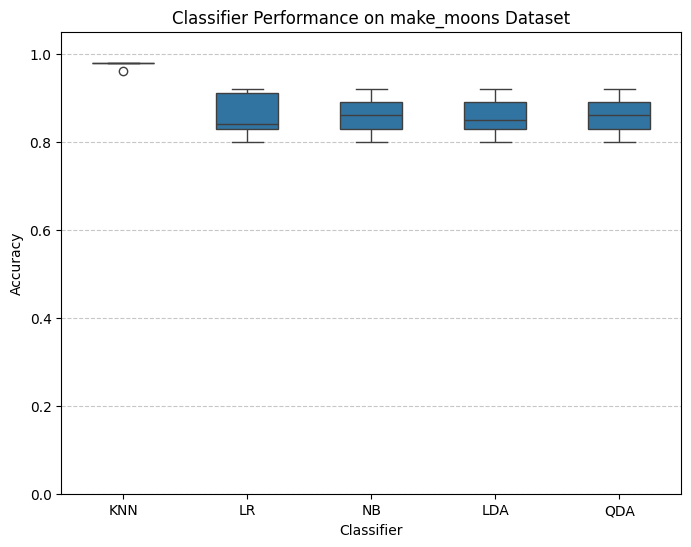

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Classifier', y='Accuracy', data=results1_df,  width=0.5)
plt.title('Classifier Performance on make_moons Dataset')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

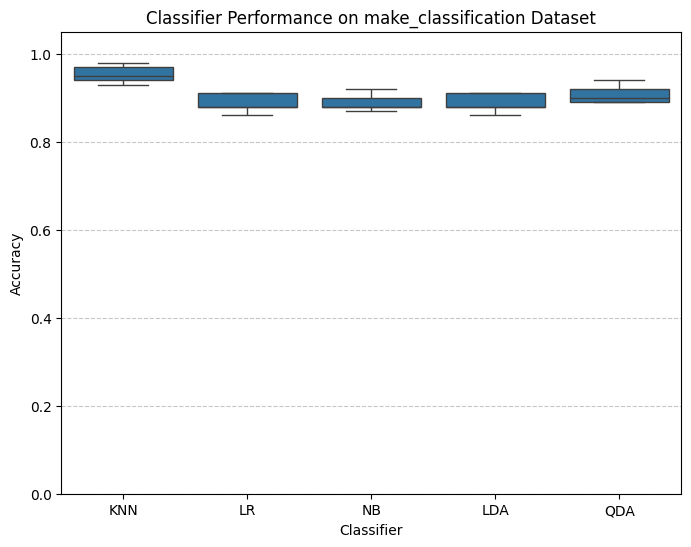

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Classifier', y='Accuracy', data=results2_df)
plt.title('Classifier Performance on make_classification Dataset')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

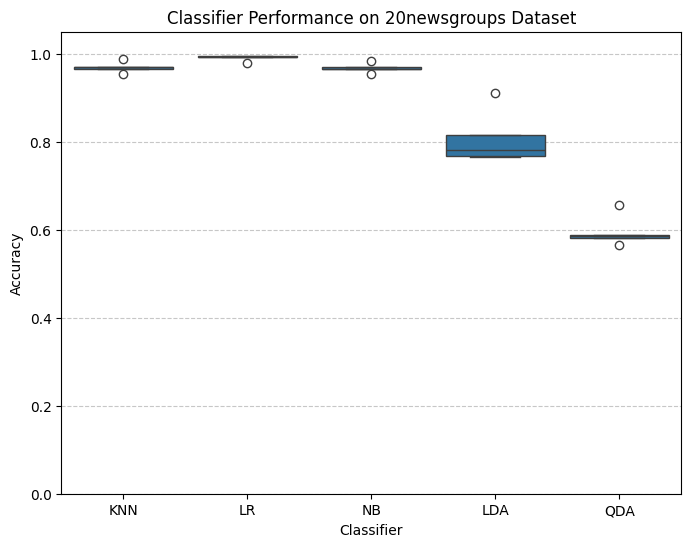

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Classifier', y='Accuracy', data=results3_df)
plt.title('Classifier Performance on 20newsgroups Dataset')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

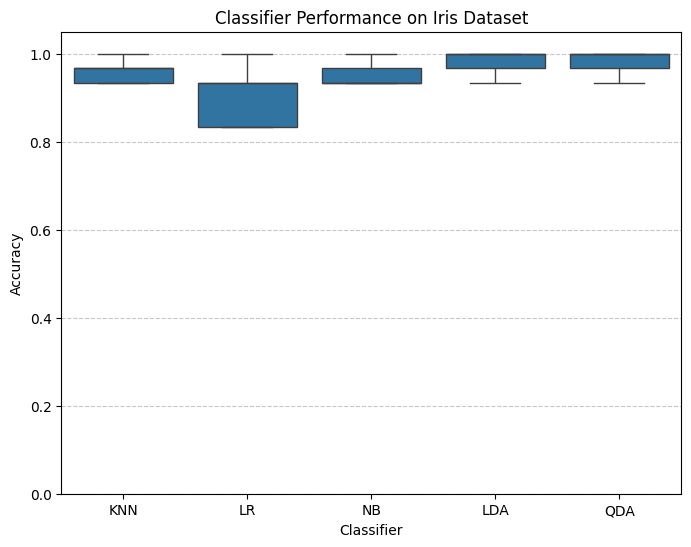

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Classifier', y='Accuracy', data=results4_df)
plt.title('Classifier Performance on Iris Dataset')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

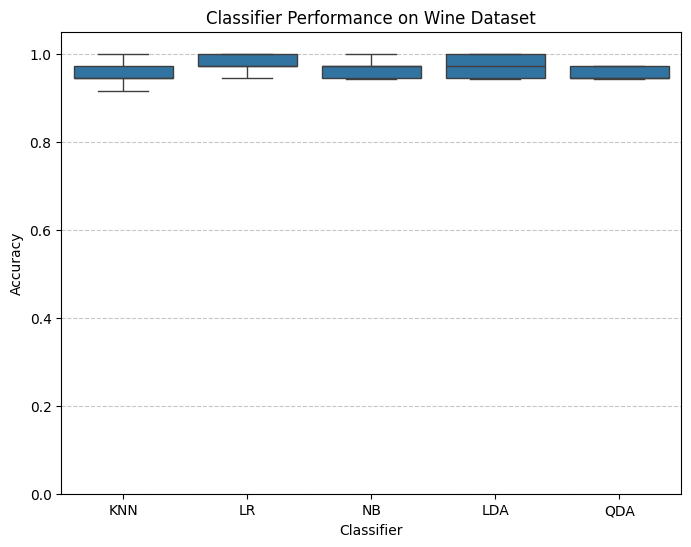

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Classifier', y='Accuracy', data=results5_df)
plt.title('Classifier Performance on Wine Dataset')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**6. Identify which classifier performs best for each dataset and explain why (based on assumptions).**

- The make_moons dataset has a non-linear.
- KNN is a non parametric algorithm such that it makes no assumptions about the distribution of data.
- It classifies points based on the majority class of their nearest neighbors allowing it to adapt to and accurately capture the non-linear structure.

- The make_classification dataset is linearly separable with some noise.
- KNN's instance-based approach, showing strong flexibility in decision boundaries.
- QDA does well since it can capture class-specific covariance structures but not as well as KNN when boundaries are irregular.

- The fetch 20 new groups dataset is a high-dimensional and sparse dataset.
- LR is robust and efficient on this data type.
- Naive Bayes is a probabilistic classifier that makes a key assumption that all features are independent of each other given the class.
- While this assumption is not perfectly true for words in a document, it works well in high-dimensional text data making NB a classic and effective choice.
- LDA and QDA perform poorly because their core assumptions about dense, low-dimensional data.

 - The load_iris dataset's classes are normally distributed with fairly homogeneous covariance among classes that are well-suited for LDA and slightly quadratic separability that are well suited for QDA.
 - LDA and QDA explicitly model Gaussian class distributions, so they achieve near-perfect performance.
 - KNN also performs well, but Gaussian-based classifiers are theoretically more aligned with the dataset's structure.

- The load_wine dataset's classes have a structure that is fundamentally linearly separable.
- LDA assumes that the classes within a dataset are drawn from a Gaussian distribution with a shared, common covariance matrix.
- It works by finding a linear combination of features that maximizes the separation between classes.